# QF 627 Programming and Computational Finance
## Individual Assessment

***

> Good evening, Team. 👋

> This assessment is prepared so that you may review what you have learned on the course. You can find the answers from the lessons and from the scripts of each lesson that you have received throughout the course. Please do not feel yourselves to be under pressure. `Read each question carefully and answer accordingly`.

> Using Python in real-world financial data analysis does not mean simply executing a single step of an independent chunk of code. It requires a chain of lines of codes with a sharp logical progression. To give you a good exercise in real-world practice, the questions here, just like all the lessons and exercise problem sets, require you to go through `inter-related` and `logically deduced lines of programming`.

***

> Below are 10 questions. Each question asks you to program a sequence of codes that lead to an answer. First `ensure you fully understand the question`, in order not to overlook essential processes and answers. When questions ask for answers in addition to lines of codes, provide them using a markdown cell.

***

> Be sure to submit your work before the deadline: `9:30pm tonight, November 8, 2022`. It is an open-book exercise, and is also a timed task. To be fair to all students, a late submission will incur a point reduction.

> Please note `your last name` for `naming your submission` file (e.g., `Roh.ipynb`)

> If you find that you cannot answer a question, it would be wise to move on to another question that you can answer, and to finish that one first. `Make the best use of the time available`. If you cannot fully answer all the questions, then do as much as you can.

***

> Under a relative grading scheme, not everyone can receive an A grade for the course. This is school policy. If you find the questions easy, that does not guarantee your good final performance. If you find the questions a bit difficult, that is so that you may be given a valid and fair assessment. `It does not mean that you are failing`.

***

> Rather than feeling pressured by the assessment, I hope you will enjoy the opportunity presented by the hands-on exercise. You will notice that `answering each question will further consolidate your learning`.

***

> I wish you the best for your individual assessment, Team.🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
# Our standardized printing options

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 and 2 ask you to assess the correlations of stocks returns, using two methods of analysis.

###  <font color = blue> 👉 Questions 1 </font>. Extract the stock prices of the following ticker symbols, from July 2013 to June 2022.

| Security | Symbol |
| -------- | ------ |
Merck | `MRK`
Marriott | `MAR`
3M | `MMM`
Adobe | `ADBE`
Aon | `AON`
American Airlines | `AAL`
Capital One | `COF`
Coca-Cola | `KO`
Citigroup | `C`

### Assess which of the pairs of tickers (there are 36 unique possible pairs) appear to show the closest relationships (i.e., greatest correlations) when comparing daily percentage changes.

### Make sure to provide the lines of code that lead to your answers, and give your answers in `Answer 1 cell`.

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
#extraction source 1, used in lesson 3 and 4

import datetime as dt

import pandas_datareader.data as web
#extraction source 2, used in lesson 2

In [3]:
def obtain_price(tickers, start, end): 
    def data(ticker): 
        return(pdr.get_data_yahoo(ticker,  
                                  start = start, 
                                  end = end) 
              ) 
     
    stock_data = map(data, tickers) #iterables passed into a function
    return pd.DataFrame((pd.concat(stock_data, #object passed here must be iterables like a list of dataframes
                         keys = tickers,                         #make tickers the leftmost index otherwise will be dates
                         names = ["Ticker"]))["Adj Close"]).\
                         reset_index().pivot("Date", "Ticker", "Adj Close") #index, column header, data itself

In [4]:
Tickers = ["MRK","MAR","MMM","ADBE","AON","AAL","COF","KO","C"]

In [5]:
Q1_df = obtain_price(Tickers, dt.datetime(2013, 7, 1),dt.datetime(2022, 6, 30))
Q1_df

C:\Users\bryan\AppData\Local\Temp\ipykernel_21148\2170556510.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  return pd.DataFrame((pd.concat(stock_data, #object passed here must be iterables like a list of dataframes


Ticker,AAL,ADBE,AON,C,COF,KO,MAR,MMM,MRK
Date,,,,,,,,,
2013-07-01,15.838,46.240,59.184,40.030,53.858,30.169,36.657,83.693,33.009
2013-07-02,15.489,46.030,58.940,39.947,54.408,30.101,36.575,83.249,33.173
2013-07-03,15.791,46.420,58.505,39.549,54.137,30.191,36.639,83.801,33.173
2013-07-05,15.876,47.000,59.456,40.262,55.611,30.213,37.639,85.401,33.607
2013-07-08,15.970,46.630,59.247,41.084,55.509,30.228,37.930,85.853,33.786
...,...,...,...,...,...,...,...,...,...
2022-06-24,13.900,387.720,270.695,46.850,109.472,62.584,139.138,132.965,92.385
2022-06-27,13.560,381.070,270.476,46.821,108.985,62.455,139.937,131.451,93.655
2022-06-28,13.500,365.630,264.638,46.214,107.911,61.829,138.440,129.006,91.155


In [6]:
Q1_df.isna().any()

Ticker
AAL     False
ADBE    False
AON     False
C       False
COF     False
KO      False
MAR     False
MMM     False
MRK     False
dtype: bool

In [7]:
Q1_df_daily_return = Q1_df.pct_change(1).dropna()
Q1_df_daily_return

Ticker,AAL,ADBE,AON,C,COF,KO,MAR,MMM,MRK
Date,,,,,,,,,
2013-07-02,-0.022,-0.005,-0.004,-0.002,0.010,-0.002,-0.002,-0.005,0.005
2013-07-03,0.019,0.008,-0.007,-0.010,-0.005,0.003,0.002,0.007,0.000
2013-07-05,0.005,0.012,0.016,0.018,0.027,0.001,0.027,0.019,0.013
2013-07-08,0.006,-0.008,-0.004,0.020,-0.002,0.000,0.008,0.005,0.005
2013-07-09,0.025,0.014,-0.001,0.014,-0.000,0.007,0.000,0.011,0.004
...,...,...,...,...,...,...,...,...,...
2022-06-24,0.071,0.029,0.029,0.033,0.056,0.019,0.048,0.032,0.012
2022-06-27,-0.024,-0.017,-0.001,-0.001,-0.004,-0.002,0.006,-0.011,0.014
2022-06-28,-0.004,-0.041,-0.022,-0.013,-0.010,-0.010,-0.011,-0.019,-0.027


<AxesSubplot:title={'center':'Correlation Matrix'}, xlabel='Ticker', ylabel='Ticker'>

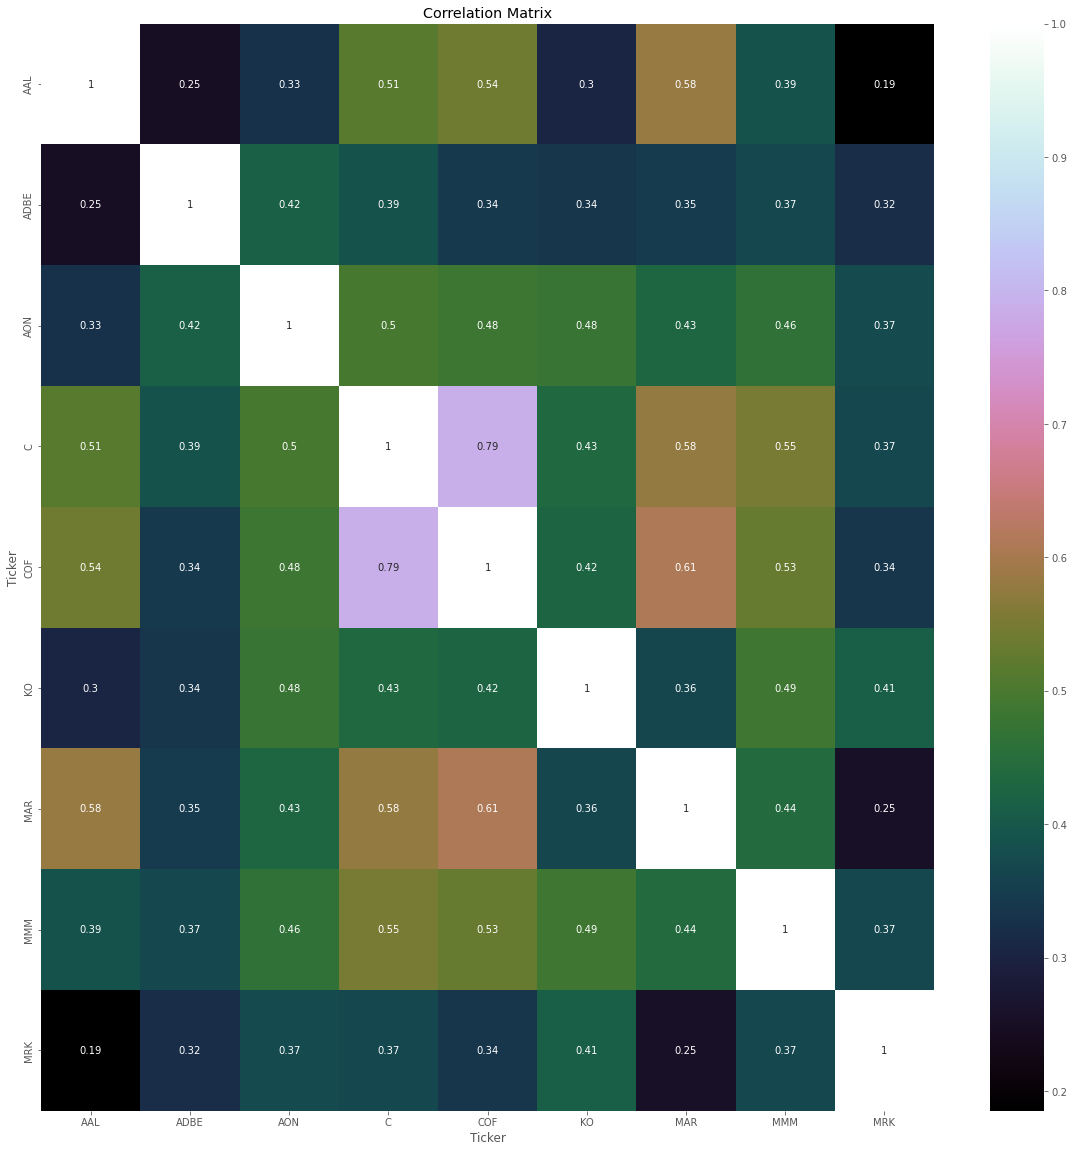

In [8]:
import seaborn as sns
corr = Q1_df_daily_return.corr()

plt.figure(figsize = (20,20))

plt.title("Correlation Matrix")

sns.heatmap(corr,
            annot = True,
            cmap = "cubehelix")

### <font color = red> Answer 1 </font>

    The answer is "COF" & "C". (Capital One and Citigroup)
    

###  <font color = blue> 👉 Questions 2 </font>. Let’s look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES) for the ticker symbols above. Run the analysis and prepare a dendrogram. 

### According to the dendrogram, which of the stocks are most strongly correlated? Working from the dendrogram, please also identify two stocks that are not well correlated.

### Report the results using the `average` and `ward` methods, respectively.

### Below are the lines of code that lead to an answer:

In [9]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.preprocessing import StandardScaler


In [10]:
Q2_df = pd.DataFrame(Q1_df_daily_return.mean() * 252, columns = ['Annual Returns'])
Q2_df['Annual Volatility'] = Q1_df_daily_return.std() * np.sqrt(252)
Q2_df

,Annual Returns,Annual Volatility
Ticker,,
AAL,0.105,0.514
ADBE,0.279,0.311
AON,0.194,0.224
C,0.066,0.324
COF,0.132,0.343
KO,0.097,0.181
MAR,0.198,0.325
MMM,0.071,0.218
MRK,0.135,0.214


In [11]:
scaler = StandardScaler().fit(Q2_df)
rescaledDataset = pd.DataFrame(scaler.fit_transform(Q2_df),
                               columns = Q2_df.columns, 
                               index = Q2_df.index)

rescaledDataset.head()
X = rescaledDataset

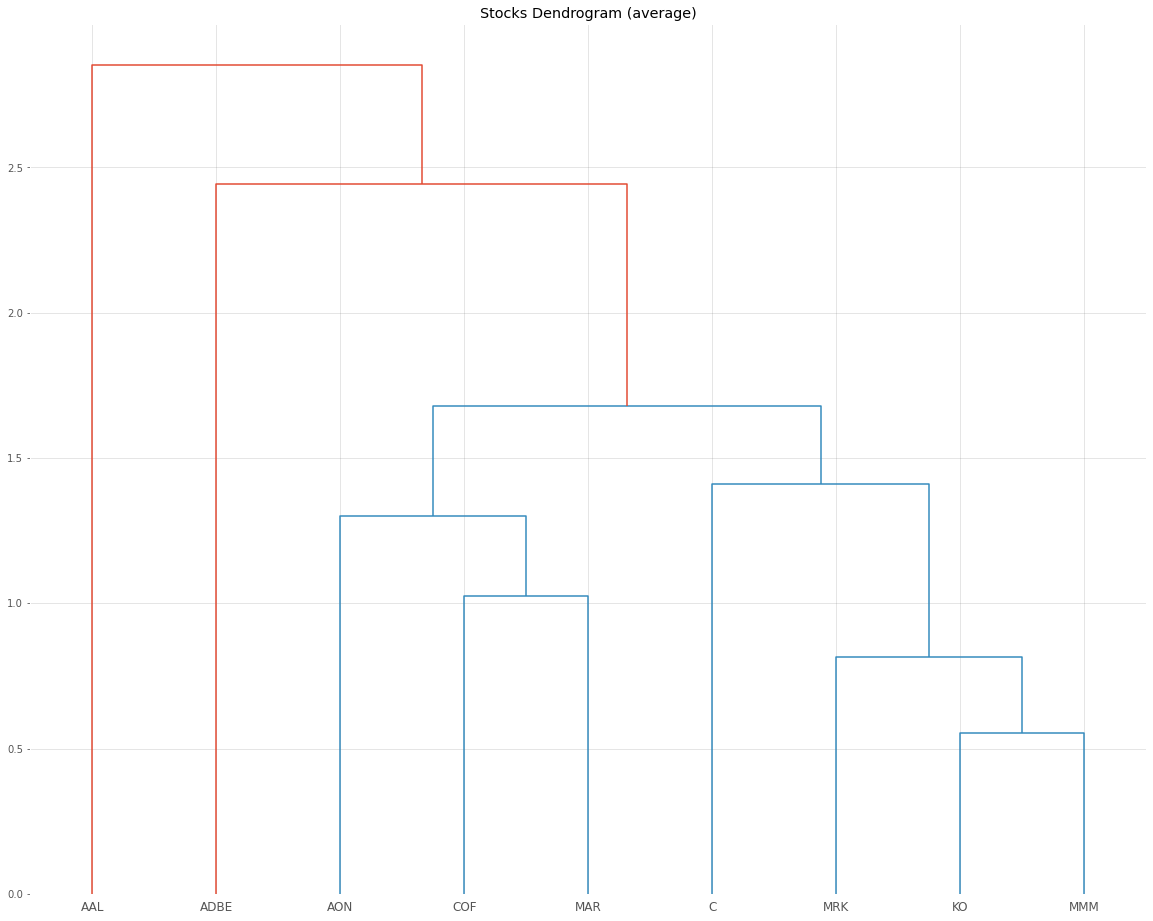

In [12]:
Z = linkage(X, method = 'average')

plt.figure(figsize = (20,16))

plt.title('Stocks Dendrogram (average)')

dendrogram(Z, labels = X.index)

plt.show()

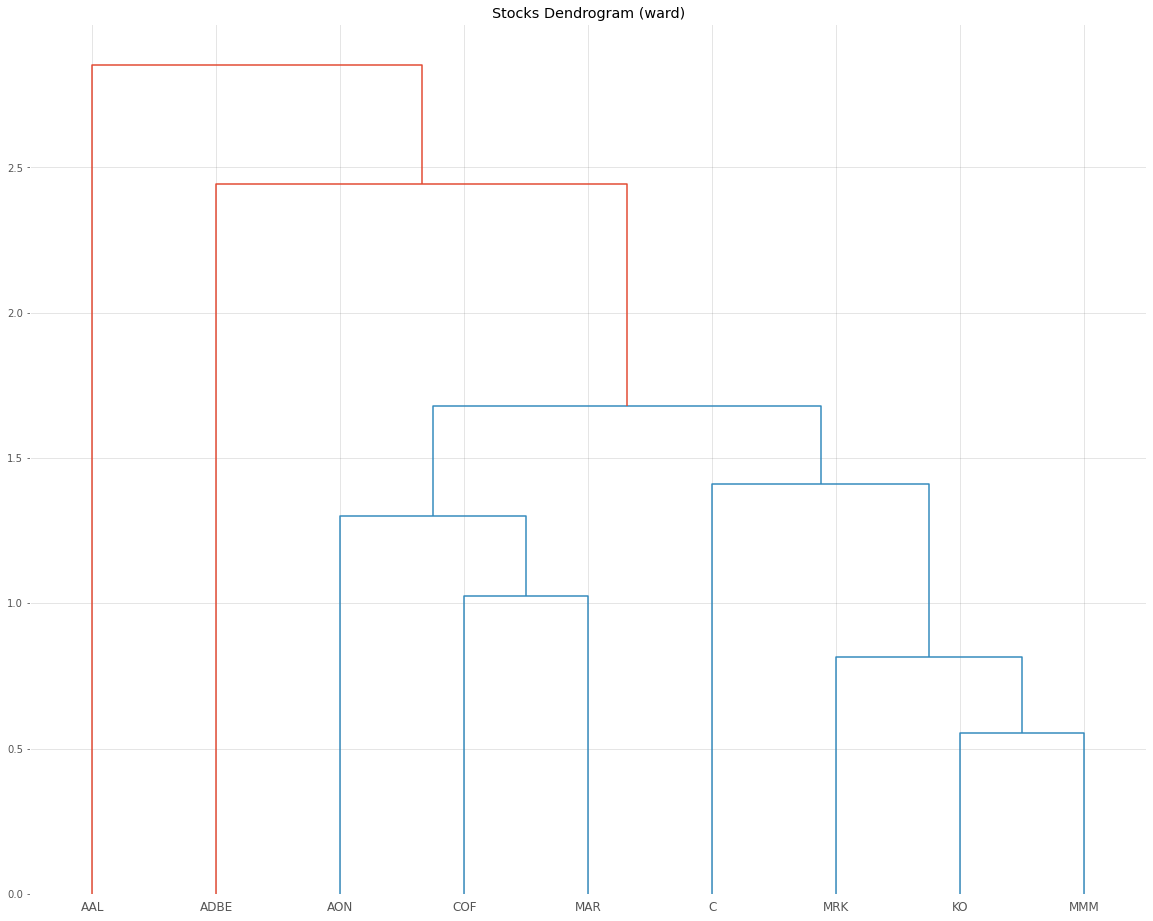

In [13]:
Z2 = linkage(X, method = 'ward')

plt.figure(figsize = (20,16))

plt.title('Stocks Dendrogram (ward)')

dendrogram(Z, labels = X.index)

plt.show()

### <font color = red> Answer 2 </font>

    The answer is the same for both ward and average methods. KO and MMM are the most correlated. AAL and MMM are not well correlated.

## 👇 Questions 3 to 5 ask you to create a predictive model for the weekly return of IBM stock. You will use supervised learning for your predictive modelling.

### <font color = "green"> NOTE: There are 10 questions in the assessment, and each question has three credits. Questions 3–5 thus have a total of nine credits allocated, but with only two actual questions. 
    
### <font color = "green"> Question 3 is about building a predictive model. For correctly completing all parts of it, you will receive three credits. 
    
### <font color = "green"> In Questions 4 and 5 you are competing with our classmates with the performance of your predictive models. 
    
### <font color = "green"> Predictive models are ultimately assessed based on their performance in prediction. Questions 4 and 5 are for `relative grading`, based on your predictive model’s performance. That is, your answer here will be assessed relative to other students’ performances.

You must give your best algorithm (`best`, based on performance metrics). 

* if your best model’s performance is among the `top three` results in class, you will receive `six points`; 
* if your best model’s performance is `between the 4th and 6th ranks`, you will receive `four points`; 
* `the rest of our classmates` will receive `two points`.

* `MSE` will be the first criterion for performance appraisal. In the event of a tie, `R-squared` will be used as a tie-breaker.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as input features here.

    Step 0. The analysis horizon is 10 years between 2010 and 2019.
    
    Step 1. Use 80% of your data for the training of your algorithm, and 20% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of IBM. The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
### <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
    
### <font color = "green"> For `input features` (`predictors`; `Xs`), you may `choose` to use any or all of the following features.

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, AMZN, MSFT);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of IBM.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this question, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

### Set `num_folds` at `10`, `seed` at `627` 
    
### The metric for assessing model performance will be mean squared error (`MSE`) and r-squared ($ R^2 $).

### Below are the lines of code that lead to an <font color = red> Answer 3 </font>:

In [14]:
def SMA(series, period):
    SMA = series.rolling(period).mean()
    return SMA


def EMA(df, n):
    EMA = pd.Series(df.ewm(span = n,
                                    min_periods = n).mean(),
                    name = "EMA_" + str(n)
                    )
    return EMA

def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series((M / N) * 100, 
                    name = "ROC_" + str(n)    
                    )
    return ROC

def MOM(df, n):
    MOM = pd.Series(df.diff(n),
                    name = "MOM_" + str(n)
                   )
    return MOM


def RSI(series, period):
    
    delta = series.diff().dropna()
    
    u = delta * 0
    d = u.copy()
    
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    
    u[u.index[period - 1]] = np.mean( u[:period] ) # 
    
    u = u.drop(u.index[:(period - 1)
                      ]
              )
    
    d[d.index[period - 1]] = np.mean( d[:period] )
    
    d = d.drop(d.index[:(period - 1)
                      ]
              )
    
    rs = u.ewm(com = period - 1, adjust = False).mean() / \
         d.ewm(com = period - 1, adjust = False).mean()
    
    return 100 - 100 / (1 + rs)

def STOK(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    
    STOD = STOK.rolling(3).mean()
    return STOD

In [15]:
target_stock = "IBM"
stock_ticker = ["IBM","AAPL","AMZN","MSFT"]
currency_ticker = ["DEXJPUS", "DEXUSUK"]
index_ticker = ["SP500", "DJIA", "VIXCLS"]

start_period = dt.datetime(2010, 1, 1)
end_period = dt.datetime(2019, 12, 31)

stock_data = pdr.DataReader(stock_ticker, "yahoo",start_period,end_period)
currency_data = pdr.DataReader(currency_ticker, "fred",start_period,end_period)
index_data = pdr.DataReader(index_ticker, "fred",start_period,end_period)

In [16]:
X0 = stock_data.loc[:, (("Close", "High", "Low"), "IBM")]
X0.columns = X0.columns.droplevel("Symbols")
X0

Attributes,Close,High,Low
Date,,,
2009-12-31,125.143,127.008,125.000
2010-01-04,126.625,127.122,125.096
2010-01-05,125.096,126.052,124.379
2010-01-06,124.283,125.707,124.101
2010-01-07,123.853,124.522,123.241
...,...,...,...
2019-12-24,129.044,129.656,128.690
2019-12-26,128.977,129.359,128.728
2019-12-27,129.321,129.780,128.939


In [17]:
dataset = X0

In [18]:
dataset["SMA21"] = SMA(dataset["Close"], 21)
dataset["SMA63"] = SMA(dataset["Close"], 63)
dataset["SMA252"] = SMA(dataset["Close"], 252)

dataset["EMA10"] = EMA(dataset["Close"], 10)
dataset["EMA30"] = EMA(dataset["Close"], 30)
dataset["EMA200"] = EMA(dataset["Close"], 200)

dataset["ROC10"] = ROC(dataset["Close"], 10)
dataset["ROC30"] = ROC(dataset["Close"], 30)

dataset["RSI10"] = RSI(dataset["Close"], 10)
dataset["RSI30"] = RSI(dataset["Close"], 30)
dataset["RSI200"] = RSI(dataset["Close"], 200)

dataset["%K10"] = STOK(dataset["Close"], dataset["Low"], dataset["High"], 10)
dataset["%D10"] = STOD(dataset["Close"], dataset["Low"], dataset["High"], 10)

dataset["%K30"] = STOK(dataset["Close"], dataset["Low"], dataset["High"], 30)
dataset["%D30"] = STOD(dataset["Close"], dataset["Low"], dataset["High"], 30)

dataset["%K200"] = STOK(dataset["Close"], dataset["Low"], dataset["High"], 200)
dataset["%D200"] = STOD(dataset["Close"], dataset["Low"], dataset["High"], 200)

C:\Users\bryan\AppData\Local\Temp\ipykernel_21148\2690311625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["SMA21"] = SMA(dataset["Close"], 21)
C:\Users\bryan\AppData\Local\Temp\ipykernel_21148\2690311625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["SMA63"] = SMA(dataset["Close"], 63)
C:\Users\bryan\AppData\Local\Temp\ipykernel_21148\2690311625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [19]:
X0

Attributes,Close,High,Low,SMA21,SMA63,SMA252,EMA10,EMA30,EMA200,ROC10,ROC30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200
Date,,,,,,,,,,,,,,,,,,,,
2009-12-31,125.143,127.008,125.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,126.625,127.122,125.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,125.096,126.052,124.379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,124.283,125.707,124.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,123.853,124.522,123.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,129.044,129.656,128.690,128.198,130.441,130.641,128.770,128.800,131.212,0.912,-0.450,54.615,48.535,49.136,51.351,65.231,71.859,72.441,31.149,32.656
2019-12-26,128.977,129.359,128.728,128.149,130.310,130.730,128.807,128.811,131.190,-0.303,0.320,53.876,48.402,49.122,48.986,56.982,73.647,73.387,30.881,31.788
2019-12-27,129.321,129.780,128.939,128.158,130.189,130.812,128.901,128.844,131.172,0.790,0.948,57.185,49.143,49.196,61.149,53.829,79.930,75.146,32.261,31.430


In [20]:
return_period = 5

Y = np.log(stock_data.loc[:, ("Adj Close", target_stock)]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+"_pred"

In [21]:
X1 = np.log(stock_data.loc[:, ("Adj Close", tuple(stock_ticker[1:])
                               )
                          ]
            ).diff(return_period)
X1.columns = X1.columns.droplevel()

X2 = np.log(currency_data).diff(return_period)
X3 = np.log(index_data).diff(return_period)

# lagged five-day, 15-day, 30-day, and 60-day returns of NFLX
X4 = pd.concat([np.log(stock_data.loc[:, ("Adj Close", target_stock)
                                     ]
                      ).diff(i) for i in [return_period, return_period * 3, return_period * 6, return_period * 12
                                         ]
               ], axis = 1
              ).dropna()
X4.columns = [f"{target_stock}_DT", f"{target_stock}_3DT", f"{target_stock}_6DT", f"{target_stock}_12DT"]


X = pd.concat([X0, X1, X2, X3, X4], axis = 1)

In [22]:
X = X.drop(["Close", "High", "Low"],
                       axis = 1
                      ) # note the axis 
X = X.dropna(axis = 0) # note the axis

In [23]:
X

,SMA21,SMA63,SMA252,EMA10,EMA30,EMA200,ROC10,ROC30,RSI10,RSI30,...,MSFT,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,IBM_DT,IBM_3DT,IBM_6DT,IBM_12DT
2012-11-15,184.619,191.035,187.240,181.292,186.482,186.647,-3.919,-11.714,26.552,37.717,...,-0.069,0.018,-0.007,-0.018,-0.021,-0.027,-0.023,-0.024,-0.117,-0.072
2012-11-16,183.524,190.824,187.233,180.825,185.982,186.568,-3.709,-11.146,31.700,39.132,...,-0.075,0.023,-0.003,-0.015,-0.018,-0.126,-0.014,-0.016,-0.114,-0.056
2012-11-20,182.793,190.488,187.260,181.006,185.411,186.466,-1.025,-9.827,41.998,42.292,...,-0.014,0.029,0.003,0.010,0.003,-0.099,0.005,-0.017,-0.103,-0.029
2012-11-21,182.654,190.361,187.280,181.173,185.186,186.421,0.100,-8.510,45.895,43.583,...,0.004,0.027,0.005,0.026,0.021,-0.157,0.025,-0.018,-0.093,-0.034
2012-11-23,182.612,190.304,187.325,181.865,185.173,186.406,2.030,-5.991,55.621,47.173,...,0.038,0.013,0.010,0.036,0.033,-0.081,0.040,-0.014,-0.068,-0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,128.198,130.441,130.641,128.770,128.800,131.212,0.912,-0.450,54.615,48.535,...,0.017,-0.001,-0.012,0.010,0.009,0.030,0.006,0.021,-0.004,-0.063
2019-12-26,128.149,130.310,130.730,128.807,128.811,131.190,-0.303,0.320,53.876,48.402,...,0.027,0.004,-0.002,0.011,0.009,0.012,0.004,0.022,-0.005,-0.051
2019-12-27,128.158,130.189,130.812,128.901,128.844,131.172,0.790,0.948,57.185,49.143,...,0.021,0.000,0.004,0.006,0.007,0.071,0.005,0.025,0.006,-0.035
2019-12-30,128.114,129.998,130.887,128.550,128.723,131.130,-0.984,-1.183,37.021,44.614,...,0.001,-0.005,0.017,-0.001,-0.003,0.161,-0.021,-0.003,-0.009,-0.055


In [24]:
data = pd.concat([Y, X], axis = 1).dropna().iloc[ : :return_period, :]

In [25]:
Y = data.loc[:, Y.name]
X = data.loc[:, X.columns]

In [26]:
data.describe()

,IBM_pred,SMA21,SMA63,SMA252,EMA10,EMA30,EMA200,ROC10,ROC30,RSI10,...,MSFT,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,IBM_DT,IBM_3DT,IBM_6DT,IBM_12DT
count,339.000,339.000,339.000,339.000,339.000,339.000,339.000,339.000,339.000,339.000,...,339.000,339.000,339.000,339.000,339.000,339.000,339.000,339.000,339.000,339.000
mean,-0.000,154.219,154.925,157.801,154.031,154.370,156.885,-0.164,-0.401,49.439,...,0.006,0.001,-0.001,0.002,0.002,-0.002,0.000,-0.001,-0.003,-0.003
std,0.026,21.195,20.995,20.132,21.245,20.992,19.623,3.449,6.307,14.378,...,0.031,0.013,0.012,0.017,0.017,0.160,0.027,0.046,0.063,0.087
min,-0.108,111.134,114.836,128.228,109.152,112.787,128.839,-11.683,-23.632,9.659,...,-0.130,-0.047,-0.083,-0.074,-0.083,-0.500,-0.116,-0.212,-0.256,-0.263
25%,-0.013,138.032,138.153,142.318,138.225,138.318,142.130,-2.120,-4.362,39.539,...,-0.011,-0.006,-0.007,-0.005,-0.006,-0.092,-0.014,-0.028,-0.042,-0.064
50%,0.001,149.546,150.924,152.324,149.167,150.271,150.784,-0.061,-0.153,49.129,...,0.006,0.001,-0.000,0.003,0.003,-0.013,0.002,0.001,0.002,0.005
75%,0.015,172.264,174.083,177.539,172.512,173.271,178.806,1.799,3.442,59.358,...,0.022,0.008,0.007,0.012,0.012,0.074,0.016,0.027,0.037,0.056
max,0.081,202.885,197.796,191.203,202.787,200.643,192.442,14.128,25.541,84.615,...,0.140,0.058,0.034,0.059,0.056,0.992,0.092,0.137,0.208,0.250


In [27]:
validation_size = 0.20

train_size = int(len(X) * (1 - validation_size)
                 )

X_train, X_test = X[0:train_size], X[train_size:len(X)]

Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [28]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from tensorflow.keras.optimizers import SGD

from keras.wrappers.scikit_learn import KerasRegressor


import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [29]:
models = []

models.append(("LR", LinearRegression()
              )
             )
models.append(("EN", ElasticNet()
              )
             )
models.append(("LASSO", Lasso()
              )
             )
models.append(("SVR", SVR()
              )
             )

models.append(("KNN", KNeighborsRegressor()
              )
             )

models.append(("CART", DecisionTreeRegressor()
              )
             )
models.append(("ETR", ExtraTreesRegressor()
              )
             )

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [30]:
import warnings
warnings.filterwarnings("ignore")

from collections import defaultdict

In [31]:
num_folds = 10
seed = 627
scoring = "neg_mean_squared_error"

names = []

kfold_results = []

train_results = []
test_results = []
predictions = defaultdict(list)

for name, model in models:
    names.append(name)
    
    # Let's run K-Fold analysis
    
    kfold = KFold(n_splits = num_folds,
                  random_state = seed, shuffle=True)
    
    # Let's convert MSE to positive (HERE, the lower the better)
    
    cv_results = -1 * cross_val_score(model, X_train, Y_train,
                                      cv = kfold,
                                      scoring = scoring)
    
    kfold_results.append(cv_results) # REMEMBER TO ADD THIS
    
    # Entire training period
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Results for test
    Y_hat = res.predict(X_test)
    test_result = mean_squared_error(Y_hat, Y_test)
    test_results.append(test_result)
    predictions[name] = [Y_hat, Y_test]
    
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(message)

LR: 0.000716 (0.000299) 0.000553 0.001065
EN: 0.000647 (0.000253) 0.000639 0.000919
LASSO: 0.000647 (0.000253) 0.000639 0.000919
SVR: 0.001165 (0.000334) 0.001165 0.001446
KNN: 0.000776 (0.000265) 0.000546 0.001042
CART: 0.001248 (0.000322) 0.000000 0.001651
ETR: 0.000732 (0.000289) 0.000000 0.001053
RFR: 0.000734 (0.000250) 0.000102 0.000969
GBR: 0.000804 (0.000266) 0.000087 0.001183
ABR: 0.000713 (0.000251) 0.000379 0.001016


In [32]:
# TODO: Fix exogeneous variables
X_train_ARIMA = X_train.loc[:, X_train.columns
                            ]

X_test_ARIMA = X_test.loc[:, X_test.columns
                          ]

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

modelARIMA = stats.ARIMA(endog= Y_train, exog = X_train_ARIMA, order = [1, 0, 0]
                         )

model_fit = modelARIMA.fit()

error_Training_ARIMA = mean_squared_error(Y_train,
                                          model_fit.fittedvalues)

predicted = model_fit.predict(start = train_len -1, 
                              end = total_len - 1, 
                              exog = X_test_ARIMA)[1:]

error_Test_ARIMA = mean_squared_error(Y_test,
                                      predicted)

error_Test_ARIMA

0.0010645301629523588

In [33]:
test_results.append(error_Test_ARIMA)

train_results.append(error_Training_ARIMA)

names.append("ARIMA")

### Below are the lines of code that lead to an <font color = red>Answer 4</font> and <font color = red>Answer 5</font> :

### <font color = green> NOTE: You must give your best algorithm here (`best`, based on performance metrics). 

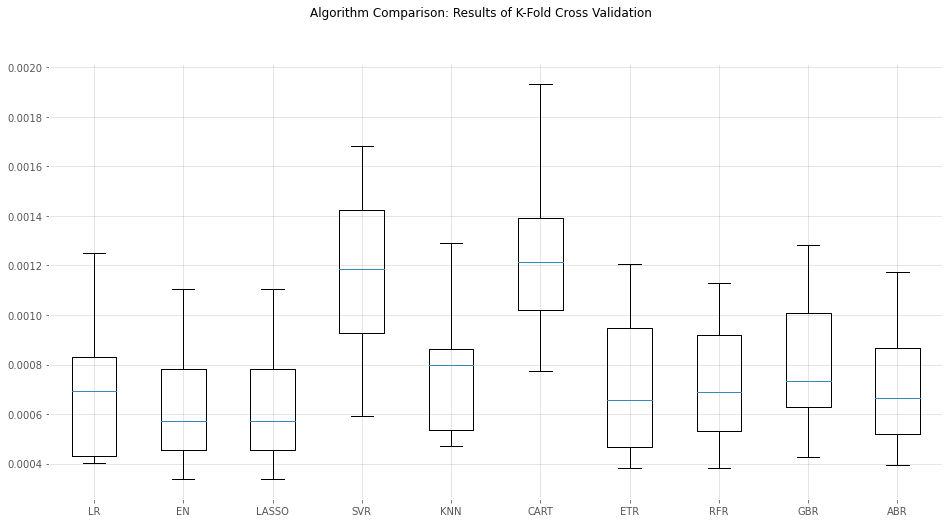

In [34]:
fig = plt.figure(figsize = (16, 8)
                 )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)

ax.set_xticklabels(names[:-1])

plt.show()

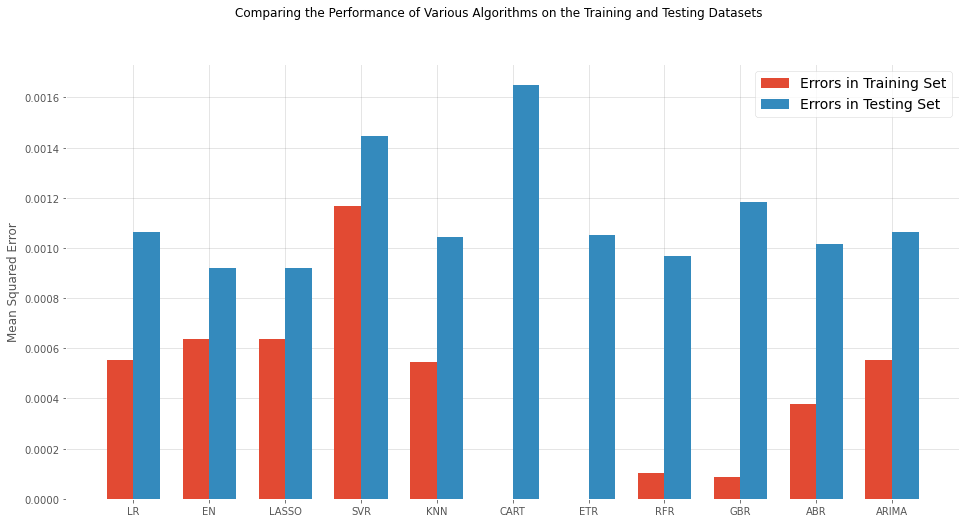

In [35]:
fig = plt.figure(figsize = (16, 8)
                 )

ind = np.arange(len(names)
               ) 
width = 0.35

fig.suptitle("Comparing the Performance of Various Algorithms on the Training and Testing Datasets")
ax = fig.add_subplot(111)

plt.bar(ind - width/2, 
        train_results, 
        width = width,
        label = "Errors in Training Set")

plt.bar(ind + width/2, 
        test_results, 
        width = width,
        label = "Errors in Testing Set")

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error")

plt.show()

In [36]:
pred_model = "RFR"


pred_df = pd.DataFrame(predictions[pred_model])
pred_df = pred_df.T
pred_df.set_index(predictions[pred_model][1].index, inplace=True)
pred_df.rename(columns = {0: "predicted", 1: "actual"}, inplace=True)
pred_df

,predicted,actual
2018-07-19,0.008,-0.017
2018-07-26,0.012,-0.026
2018-08-02,0.019,0.023
2018-08-09,0.010,0.004
2018-08-16,0.014,0.000
...,...,...
2019-11-20,0.008,0.004
2019-11-27,0.002,-0.014
2019-12-06,0.003,0.007
2019-12-13,0.006,0.010


<AxesSubplot:>

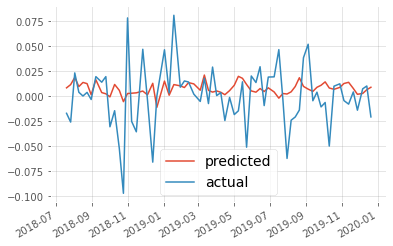

In [37]:
pred_df.plot()

The best algorithm in my model is Random Forest. Although Elastic Net and LASSO technically have lower MSE, I have chosen Random Forest because EN and LASSO are simply predicting the same number repeatedly.

### <font color = blue> 👉 Question 6</font>. This question is where you will execute principal component analysis (PCA) for portfolio management.
    
### As learned from the course, the principal components of the correlation matrix capture most of the covariation among assets in descending order and are mutually uncorrelated. Importantly, we can employ standardized principal components as portfolio weights. 

### Randomly choose 30 stock tickers among the stock tickers from below DF.
    
### Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
### Your objective is to find the best-performing portfolio, using PCA. Using what you learned in class, identify the profile of each portfolio. Please visualize and show the relative performances of the four portfolios (Disregard the portfolio that shows infinite returns, and use the other four).
    
### Please use 75% of your data for PCA and 25% for backtesting. 
    
### <font color = "green"> NOTE: The investment horizon will be 7 years between 2013 and 2019.

In [38]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

list_of_tickers

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,ADP,ADP,Information Technology,Data Processing & Outsourced Services
3,Airbnb,ABNB,Consumer Discretionary,Internet & Direct Marketing Retail
4,Align Technology,ALGN,Health Care,Health Care Supplies
...,...,...,...,...
97,Walgreens Boots Alliance,WBA,Consumer Staples,Drug Retail
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities
100,Zoom Video Communications,ZM,Information Technology,Application Software


### Below are the lines of code that lead to an answer:

In [39]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
import random
from pandas.plotting import scatter_matrix

In [40]:
stock_indexes = []

random.seed(627)

def random_generator(x):
    for i in range(x):
        stock_indexes.append(random.randint(0,102))
    return stock_indexes

random_generator(30)

[32,
 93,
 75,
 13,
 16,
 28,
 2,
 31,
 14,
 53,
 20,
 26,
 83,
 65,
 68,
 56,
 71,
 90,
 24,
 42,
 33,
 95,
 21,
 20,
 33,
 93,
 35,
 85,
 9,
 13]

In [41]:
stock_symbols = []

for index in stock_indexes:
    stock_symbols.append(list_of_tickers.Ticker[index])

In [42]:
len(stock_symbols)

30

In [43]:
Q6_df = web.DataReader(stock_symbols,'yahoo', dt.datetime(2013, 1, 2), dt.datetime(2019, 12, 31))['Adj Close']


In [44]:
daily_returns = Q6_df.pct_change()[1:]
daily_returns = daily_returns.dropna(axis=1)

daily_returns

Symbols,TXN,ODFL,AAPL,AZN,CMCSA,ADP,COST,AMAT,KLAC,BIIB,...,NVDA,SNPS,CHTR,FISV,CSX,VRSK,BKNG,DXCM,SGEN,AEP
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,-0.013,-0.011,-0.013,-0.002,-0.011,0.004,0.010,-0.003,-0.009,-0.014,...,0.001,-0.012,-0.002,-0.008,0.009,0.012,0.016,0.009,0.014,-0.001
2013-01-04,-0.002,0.011,-0.028,0.000,-0.001,0.009,-0.003,0.000,-0.003,-0.013,...,0.033,-0.008,-0.005,0.000,0.028,-0.002,-0.000,0.014,0.020,-0.002
2013-01-07,0.003,0.006,-0.006,-0.001,-0.004,-0.004,-0.008,-0.012,-0.007,0.003,...,-0.029,-0.007,-0.003,0.006,-0.023,-0.004,0.014,0.016,0.048,-0.004
2013-01-08,-0.012,-0.017,0.003,0.001,0.007,0.006,-0.002,-0.014,-0.026,-0.014,...,-0.022,0.001,-0.003,0.005,0.002,0.012,0.000,0.006,0.013,-0.005
2013-01-09,0.014,0.011,-0.016,-0.006,0.007,-0.003,0.000,0.015,0.010,-0.002,...,-0.022,-0.001,0.018,0.015,0.001,0.001,-0.009,0.008,0.025,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.000,0.003,0.001,-0.000,0.010,-0.001,0.003,0.007,0.006,0.008,...,-0.001,-0.012,0.000,0.003,0.004,-0.003,0.006,0.000,0.003,0.001
2019-12-26,-0.000,0.001,0.020,-0.000,0.010,0.003,0.005,-0.003,0.004,-0.007,...,0.002,0.013,0.010,-0.005,-0.002,-0.002,0.010,-0.005,-0.016,0.000
2019-12-27,0.001,0.004,-0.000,0.012,0.003,0.002,-0.005,-0.002,-0.001,-0.006,...,-0.010,0.004,-0.004,0.009,-0.000,-0.002,0.004,0.013,-0.001,0.003


In [45]:
size = int(len(daily_returns) * 0.75)

training_set = daily_returns[:size]
testing_set = daily_returns[size:]

print('Training Set:', training_set.shape)
print('Testing Set:', testing_set.shape)

Training Set: (1320, 24)
Testing Set: (441, 24)


In [46]:
scaler = StandardScaler().fit(training_set)

scaled_returns = pd.DataFrame(scaler.fit_transform(training_set), 
                            columns = training_set.columns,
                              index = training_set.index)

scaled_returns

Symbols,TXN,ODFL,AAPL,AZN,CMCSA,ADP,COST,AMAT,KLAC,BIIB,...,NVDA,SNPS,CHTR,FISV,CSX,VRSK,BKNG,DXCM,SGEN,AEP
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,-1.023,-0.821,-0.886,-0.168,-0.942,0.290,0.901,-0.220,-0.594,-0.694,...,-0.075,-1.105,-0.159,-0.814,0.513,0.951,0.932,0.242,0.474,-0.121
2013-01-04,-0.237,0.688,-1.895,-0.040,-0.087,0.738,-0.357,-0.077,-0.261,-0.638,...,1.359,-0.758,-0.354,-0.060,1.672,-0.194,-0.092,0.439,0.725,-0.211
2013-01-07,0.152,0.368,-0.440,-0.097,-0.404,-0.423,-0.778,-0.745,-0.500,0.125,...,-1.395,-0.708,-0.220,0.510,-1.452,-0.438,0.788,0.506,1.768,-0.459
2013-01-08,-0.921,-1.280,0.128,0.017,0.506,0.456,-0.231,-0.850,-1.654,-0.676,...,-1.085,0.045,-0.220,0.364,0.089,0.994,-0.058,0.134,0.434,-0.551
2013-01-09,0.961,0.669,-1.085,-0.482,0.503,-0.299,-0.010,0.756,0.550,-0.131,...,-1.107,-0.151,0.993,1.360,0.030,0.032,-0.607,0.229,0.877,-0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-26,3.684,1.804,3.092,1.146,0.851,3.981,3.237,3.069,2.884,1.411,...,2.089,1.925,-0.108,1.642,1.486,1.209,1.313,0.634,1.878,1.307
2018-03-27,-2.835,-2.378,-1.748,-0.218,-1.363,-1.505,-2.086,-2.999,-3.071,-0.558,...,-3.560,-1.460,-0.436,-1.439,-1.097,-1.666,-1.679,-0.148,-1.680,1.580
2018-03-28,-0.538,-0.391,-0.782,0.871,0.661,-0.474,0.178,-1.480,-0.768,1.136,...,-0.932,-0.695,-0.816,0.531,-0.492,0.037,-0.739,1.576,0.314,0.277


In [47]:
pca = PCA()

principal_component = pca.fit(training_set)
pca.components_[0]

array([-0.197, -0.174, -0.155, -0.146, -0.142, -0.145, -0.097, -0.251,
       -0.208, -0.284, -0.16 , -0.309, -0.179, -0.147, -0.269, -0.154,
       -0.157, -0.148, -0.187, -0.126, -0.206, -0.304, -0.377, -0.058])

In [48]:
def PCWeights():
    """
    Principal Compoments Weights
    """
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                   )
        
    weights = weights.values.T
    return weights

weights = PCWeights()
weights[0]

array([0.043, 0.038, 0.034, 0.032, 0.031, 0.032, 0.021, 0.055, 0.046,
       0.062, 0.035, 0.067, 0.039, 0.032, 0.059, 0.034, 0.034, 0.032,
       0.041, 0.028, 0.045, 0.066, 0.082, 0.013])

### <font color = red> Answer 6 (`including visualization component`) is presented in the cell below: </font>

array([[<AxesSubplot:title={'center':'Portfolio 0'}, xlabel='Symbols'>],
       [<AxesSubplot:title={'center':'Portfolio 1'}, xlabel='Symbols'>],
       [<AxesSubplot:title={'center':'Portfolio 2'}, xlabel='Symbols'>],
       [<AxesSubplot:title={'center':'Portfolio 3'}, xlabel='Symbols'>]],
      dtype=object)

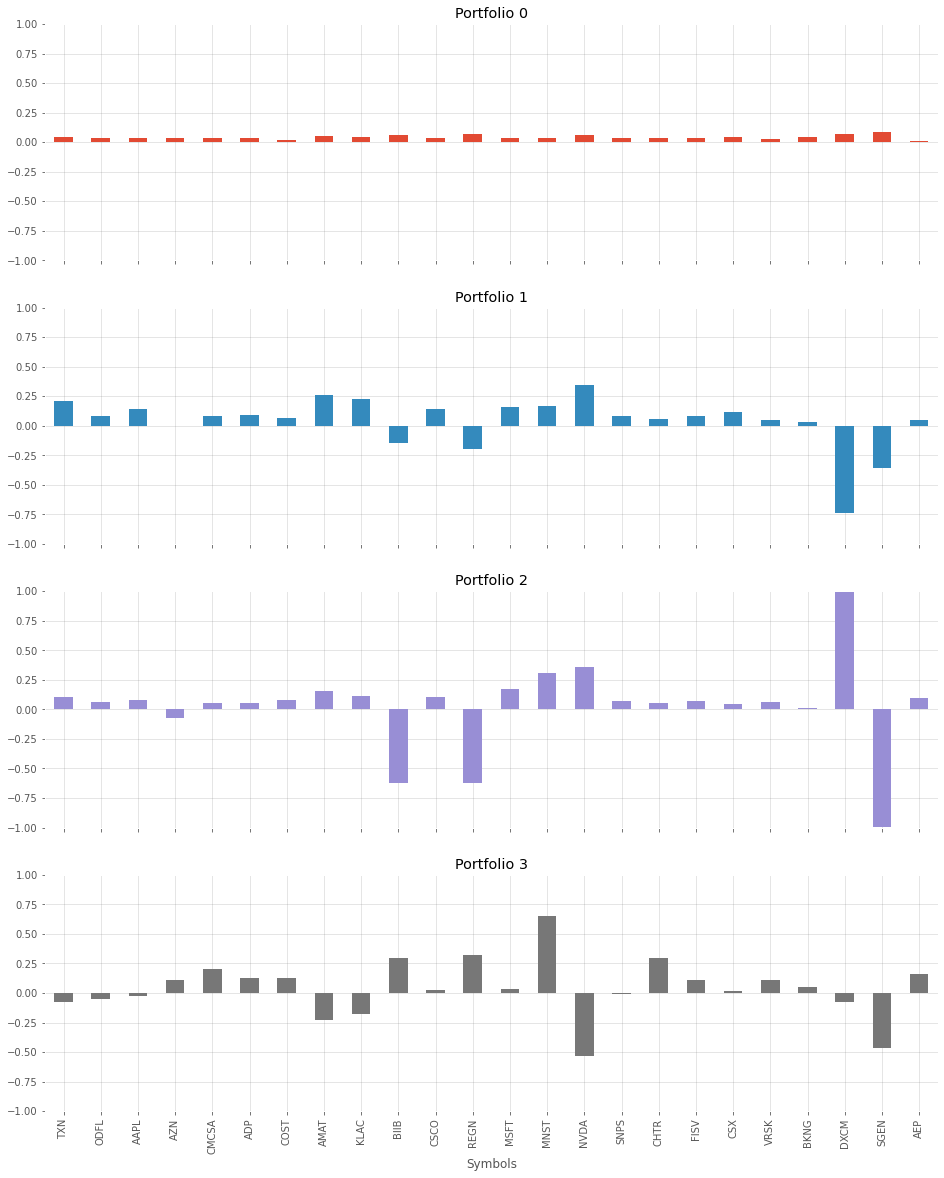

In [49]:
NumComponents = 4

topPortfolios = pd.DataFrame(pca.components_[:NumComponents],
                             columns = training_set.columns)

eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis = 0)

eigen_portfolios.index = [f"Portfolio {i}" for i in range( NumComponents)
                          ]

np.sqrt(pca.explained_variance_)

eigen_portfolios.T.plot.bar(subplots = True,
                            layout = (int(NumComponents), 1),
                            legend = False,
                            sharey = True,
                            ylim = (-1, 1),
                            figsize = (16, 20)
                           )

In [50]:
def sharpe_ratio(ts_returns, periods_per_year = 252):
    
    n_years = ts_returns.shape[0]/periods_per_year
    
    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                 ) - 1
    
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    
    annualized_sharpe = annualized_return / annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe

In [51]:
def FindOptimalPortfolio():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = training_set.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i])
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(training_set.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = training_set.index)
        
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )

In [52]:
FindOptimalPortfolio()

Our Eigen Portfolio #0 with the highest Sharpe. Return 25.27%, vol = 14.20%, Sharpe = 1.78
    Return    Vol  Sharpe
0    0.253  0.142   1.779
4    0.333  0.306   1.087
11   0.572  0.617   0.926
1    0.296  0.345   0.858
3    0.160  0.290   0.551
2    0.224  0.466   0.480
19   0.369  0.991   0.372
10   0.123  0.745   0.165
7   -1.000 17.294  -0.058
9   -0.110  0.639  -0.172
23  -1.000  4.470  -0.224
6   -1.000  3.998  -0.250
16  -0.952  2.988  -0.318
17  -0.989  2.754  -0.359
5   -0.496  1.277  -0.388


In [53]:
def Backtest(eigen):
    
    eigen_prtfi = pd.DataFrame(data = {"weights": eigen.squeeze()},
                               index = daily_returns.columns)
    
    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)
    
    eigen_prti_returns = np.dot(testing_set.loc[:, eigen_prtfi.index], eigen)
    
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(),
                                        index = testing_set.index)
    
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    
    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatality = %.2f%%\nSharpe = %.2f" % 
          (returns*100, vol*100, sharpe)
         )
        
    equal_weight_return = (testing_set * (1 / len(pca.components_)
                                         )
                           ).sum(axis = 1)
    
    df_plot = pd.DataFrame({"Eigen-Portfolio Return": eigen_portfolio_returns,
                            "Equal Weight Index": equal_weight_return},
                           index = testing_set.index)
    
    np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 figsize = (16, 8)
                                )
    plt.show()

Our PCA-based Portfolio:
Return = 28.09%
Volatality = 16.61%
Sharpe = 1.69


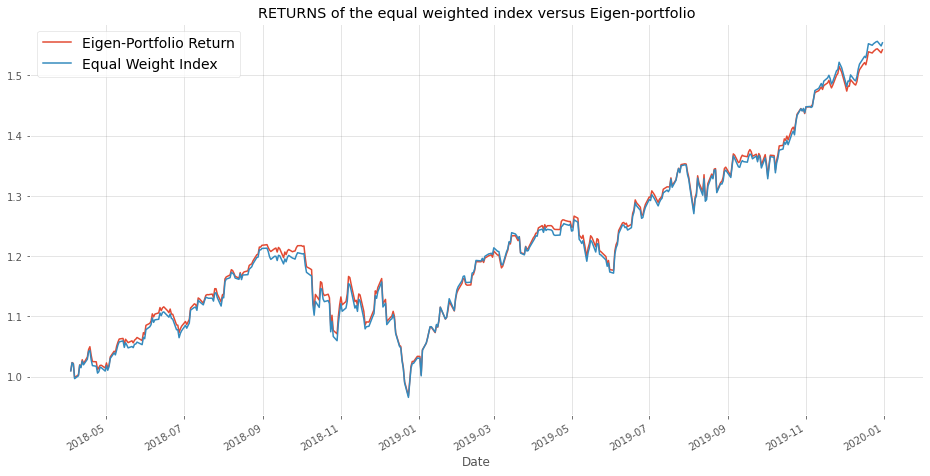

In [54]:
Backtest(weights[0])

Our PCA-based Portfolio:
Return = -0.94%
Volatality = 30.04%
Sharpe = -0.03


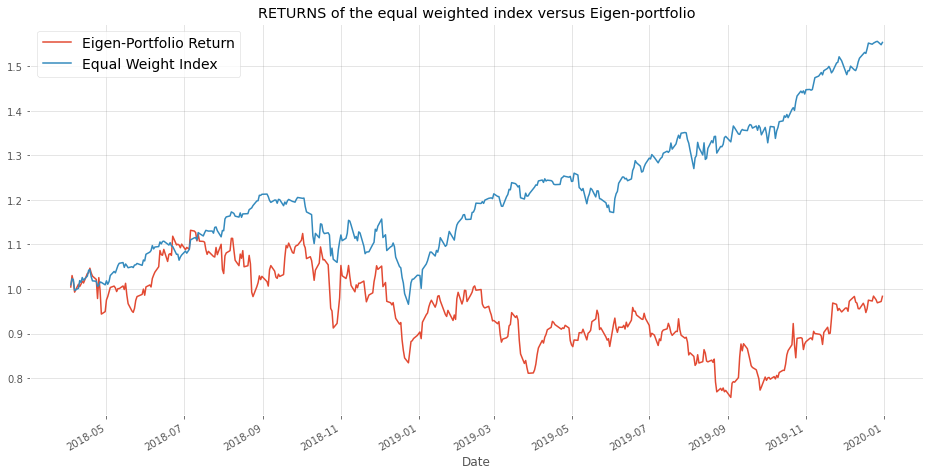

In [55]:
Backtest(weights[4])

Our PCA-based Portfolio:
Return = 60.99%
Volatality = 82.42%
Sharpe = 0.74


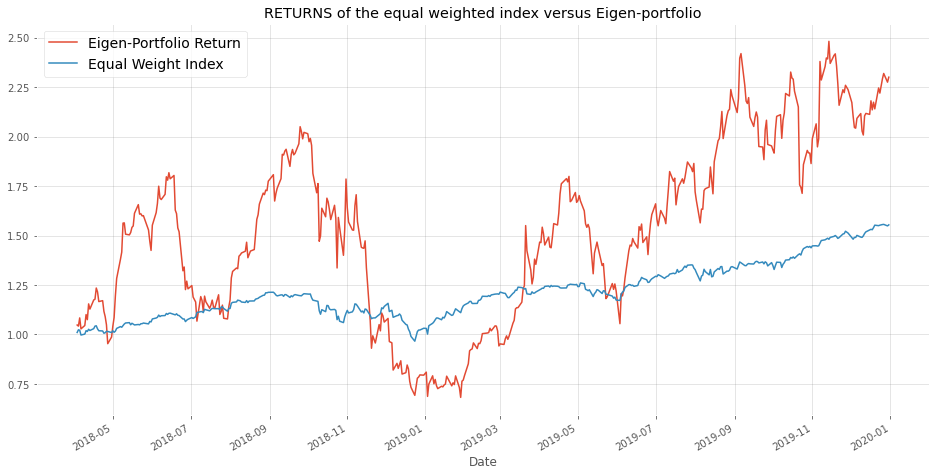

In [56]:
Backtest(weights[11])

Our PCA-based Portfolio:
Return = 21.17%
Volatality = 34.25%
Sharpe = 0.62


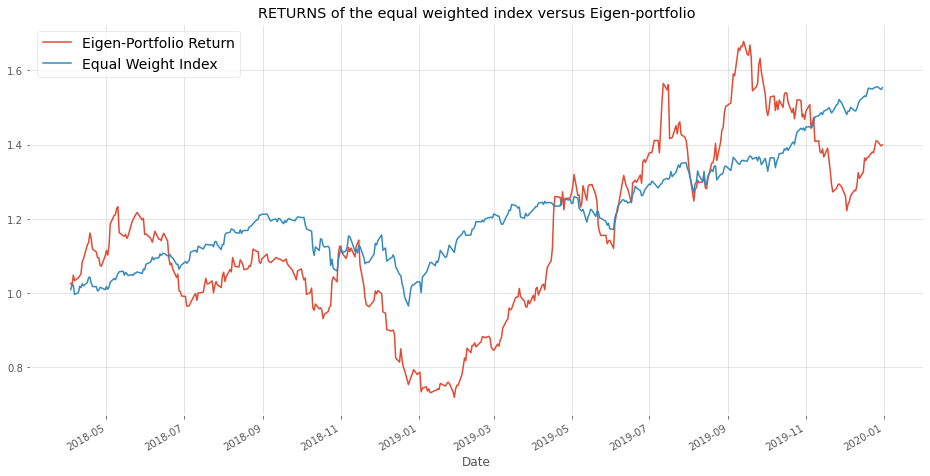

In [57]:
Backtest(weights[1])

The portfolio with the best Sharpe Ratio was the equal weighted portfolio (portfolio 0). The portfolio with the highest return during the testing period was portfolio 11.

## 👇 Questions 7 to 10 ask you to build, execute, and backtest a `moving average crossover strategy`.

###  <font color = blue> 👉 Question 7. </font> Our securities of interest are Apple (`AAPL`), Google (`GOOGL`), Microsoft (`MSFT`) stocks. The time period for analysis is from October 2006 to December 2012.

### The strategy that you'll be developing is as follows: you create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods (here, 40 days and 100 days). If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit.

### On the days that the signal is 1 and the short moving average crosses the long moving average (for the period greater than the shortest moving average window), you'll buy a 100 shares. The days on which the signal is 0, the final result will be 0 as a result of the operation 100 x signal.

### For rolling statistics, set `min_periods` at `1` and `center` argument at `False`.

### Use `adjusted` closing price.

### Let’s suppose that you started from a `$100,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the current momentum-based trading?

### Below are the lines of code that lead to an answer:

In [58]:
AAPL = pdr.get_data_yahoo("AAPL",
                        start = dt.datetime(2006, 10, 1),
                        end = dt.datetime(2012, 12, 31)
                       )[["Adj Close"]]

GOOGL = pdr.get_data_yahoo("GOOGL",
                        start = dt.datetime(2006, 10, 1),
                        end = dt.datetime(2012, 12, 31)
                       )[["Adj Close"]]

MSFT = pdr.get_data_yahoo("MSFT",
                        start = dt.datetime(2006, 10, 1),
                        end = dt.datetime(2012, 12, 31)
                       )[["Adj Close"]]


In [59]:
SHORT = 40
LONG = 100

In [60]:
BUY_or_SELL = pd.DataFrame(index = AAPL.index)

BUY_or_SELL["Adj Close"] = AAPL["Adj Close"]

BUY_or_SELL["short_moving_average"] = BUY_or_SELL["Adj Close"].rolling(window = SHORT,
                                                          min_periods = 1,
                                                          center = False).mean()

BUY_or_SELL["long_moving_average"] = BUY_or_SELL["Adj Close"].rolling(window = LONG,
                                                          min_periods = 1,
                                                          center = False).mean()

BUY_or_SELL["our_positions"] = np.where(BUY_or_SELL["short_moving_average"] < 
                                        BUY_or_SELL["long_moving_average"],
                                                   -1 , 1)

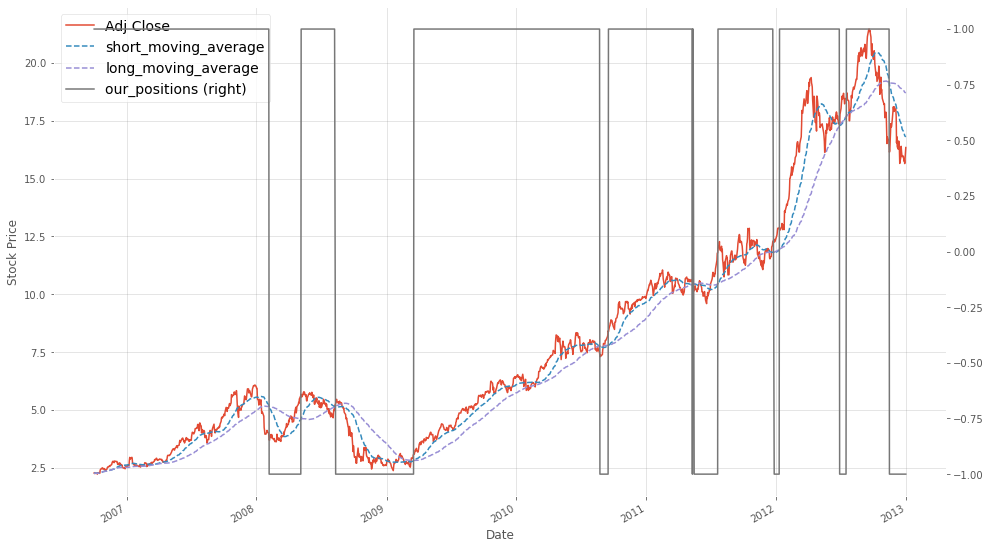

In [61]:
fig = plt.figure(figsize = (16, 10))

sub = fig.add_subplot(111,
                      ylabel = "Stock Price")

BUY_or_SELL[["Adj Close",
             "short_moving_average", # For Short and Long MA
             "long_moving_average",
            "our_positions"]].plot(ax = sub,
                                    style = ["-",
                                             "--",
                                             "--",
                                              "-"],
                                   secondary_y = "our_positions",
                                                                         ) 

plt.show()

In [62]:
our_capital = float(100000.0)

our_positions = pd.DataFrame(index = BUY_or_SELL.index).fillna(0.0)

our_positions["AAPL"] = 200*BUY_or_SELL["our_positions"]

our_portfolio = our_positions.multiply(BUY_or_SELL["Adj Close"], 
                                      axis = 0)

difference_in_shares_owned = our_positions.diff()

our_portfolio["our_holdings"] = (our_positions.multiply(BUY_or_SELL["Adj Close"],
                                                       axis = 0)
                                 ).sum(axis = 1)

our_portfolio["our_cash"] = our_capital - (difference_in_shares_owned.multiply(BUY_or_SELL["Adj Close"],
                                                                              axis = 0)
                                           ).sum(axis = 1).cumsum()

our_portfolio["total"] = our_portfolio["our_cash"] + our_portfolio["our_holdings"]

our_portfolio["returns"] = our_portfolio["total"].pct_change()

In [63]:
AAPL = our_portfolio.copy()
AAPL

,AAPL,our_holdings,our_cash,total,returns
Date,,,,,
2006-10-02,455.800,455.800,100000.000,100455.800,NaN
2006-10-03,451.051,451.051,100000.000,100451.051,-0.000
2006-10-04,458.966,458.966,100000.000,100458.966,0.000
2006-10-05,455.617,455.617,100000.000,100455.617,-0.000
2006-10-06,451.903,451.903,100000.000,100451.903,-0.000
...,...,...,...,...,...
2012-12-24,-3195.285,-3195.285,104735.520,101540.235,-0.000
2012-12-26,-3151.239,-3151.239,104735.520,101584.280,0.000
2012-12-27,-3163.896,-3163.896,104735.520,101571.623,-0.000


In [64]:
BUY_or_SELL = pd.DataFrame(index = GOOGL.index)

BUY_or_SELL["Adj Close"] = GOOGL["Adj Close"]

BUY_or_SELL["short_moving_average"] = BUY_or_SELL["Adj Close"].rolling(window = SHORT,
                                                          min_periods = 1,
                                                          center = False).mean()

BUY_or_SELL["long_moving_average"] = BUY_or_SELL["Adj Close"].rolling(window = LONG,
                                                          min_periods = 1,
                                                          center = False).mean()

BUY_or_SELL["our_positions"] = np.where(BUY_or_SELL["short_moving_average"] < 
                                        BUY_or_SELL["long_moving_average"],
                                                   -1 , 1)

In [65]:
our_capital = float(100000.0)

our_positions = pd.DataFrame(index = BUY_or_SELL.index).fillna(0.0)

our_positions["AAPL"] = 200*BUY_or_SELL["our_positions"]

our_portfolio = our_positions.multiply(BUY_or_SELL["Adj Close"], 
                                      axis = 0)

difference_in_shares_owned = our_positions.diff()

our_portfolio["our_holdings"] = (our_positions.multiply(BUY_or_SELL["Adj Close"],
                                                       axis = 0)
                                 ).sum(axis = 1)

our_portfolio["our_cash"] = our_capital - (difference_in_shares_owned.multiply(BUY_or_SELL["Adj Close"],
                                                                              axis = 0)
                                           ).sum(axis = 1).cumsum()

our_portfolio["total"] = our_portfolio["our_cash"] + our_portfolio["our_holdings"]

our_portfolio["returns"] = our_portfolio["total"].pct_change()

In [66]:
GOOGL = our_portfolio.copy()
GOOGL

,AAPL,our_holdings,our_cash,total,returns
Date,,,,,
2006-10-02,2009.209,2009.209,100000.000,102009.209,NaN
2006-10-03,2022.222,2022.222,100000.000,102022.222,0.000
2006-10-04,2080.581,2080.581,100000.000,102080.581,0.001
2006-10-05,2061.111,2061.111,100000.000,102061.111,-0.000
2006-10-06,2104.605,2104.605,100000.000,102104.605,0.000
...,...,...,...,...,...
2012-12-24,-3551.051,-3551.051,106165.265,102614.214,0.000
2012-12-26,-3547.898,-3547.898,106165.265,102617.367,0.000
2012-12-27,-3534.985,-3534.985,106165.265,102630.280,0.000


In [67]:
BUY_or_SELL = pd.DataFrame(index = MSFT.index)

BUY_or_SELL["Adj Close"] = MSFT["Adj Close"]

BUY_or_SELL["short_moving_average"] = BUY_or_SELL["Adj Close"].rolling(window = SHORT,
                                                          min_periods = 1,
                                                          center = False).mean()

BUY_or_SELL["long_moving_average"] = BUY_or_SELL["Adj Close"].rolling(window = LONG,
                                                          min_periods = 1,
                                                          center = False).mean()

BUY_or_SELL["our_positions"] = np.where(BUY_or_SELL["short_moving_average"] < 
                                        BUY_or_SELL["long_moving_average"],
                                                   -1 , 1)

In [68]:
our_capital = float(100000.0)

our_positions = pd.DataFrame(index = BUY_or_SELL.index).fillna(0.0)

our_positions["AAPL"] = 200*BUY_or_SELL["our_positions"]

our_portfolio = our_positions.multiply(BUY_or_SELL["Adj Close"], 
                                      axis = 0)

difference_in_shares_owned = our_positions.diff()

our_portfolio["our_holdings"] = (our_positions.multiply(BUY_or_SELL["Adj Close"],
                                                       axis = 0)
                                 ).sum(axis = 1)

our_portfolio["our_cash"] = our_capital - (difference_in_shares_owned.multiply(BUY_or_SELL["Adj Close"],
                                                                              axis = 0)
                                           ).sum(axis = 1).cumsum()

our_portfolio["total"] = our_portfolio["our_cash"] + our_portfolio["our_holdings"]

our_portfolio["returns"] = our_portfolio["total"].pct_change()

In [69]:
MSFT = our_portfolio.copy()
MSFT

,AAPL,our_holdings,our_cash,total,returns
Date,,,,,
2006-10-02,3960.901,3960.901,100000.000,103960.901,NaN
2006-10-03,3962.350,3962.350,100000.000,103962.350,0.000
2006-10-04,4044.868,4044.868,100000.000,104044.868,0.001
2006-10-05,4041.972,4041.972,100000.000,104041.972,-0.000
2006-10-06,4034.733,4034.733,100000.000,104034.733,-0.000
...,...,...,...,...,...
2012-12-24,-4475.162,-4475.162,105773.851,101298.690,0.001
2012-12-26,-4442.085,-4442.085,105773.851,101331.767,0.000
2012-12-27,-4458.623,-4458.623,105773.851,101315.229,-0.000


### <font color = red> Answer 7 </font>


    AAPL  : _$101466.524 
    
    GOOGL : _$102624.825 
    
    MSFT  : _$101356.580	 


###  <font color = blue> 👉 Question 8. </font>  

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `AAPL`, `GOOGL`, and `MSFT`.

### Below are the lines of code that lead to an answer:

In [70]:
AAPL["CUMULATIVE_RETURNS"] = AAPL['returns'].cumsum().apply(np.exp)
AAPL['MAX_GROSS_PERFORMANCE'] = AAPL['CUMULATIVE_RETURNS'].cummax()

In [71]:
drawdown = (AAPL['MAX_GROSS_PERFORMANCE'] - AAPL["CUMULATIVE_RETURNS"])/AAPL['MAX_GROSS_PERFORMANCE']
drawdown.max()

0.014573335635274595

In [72]:
drawdown_period1 = (AAPL.index[-1].to_pydatetime() - drawdown[drawdown == 0].index[-1].to_pydatetime())
drawdown_period1.days

266

In [73]:
GOOGL["CUMULATIVE_RETURNS"] = GOOGL['returns'].cumsum().apply(np.exp)
GOOGL['MAX_GROSS_PERFORMANCE'] = GOOGL['CUMULATIVE_RETURNS'].cummax()

In [74]:
drawdown = (GOOGL['MAX_GROSS_PERFORMANCE'] - GOOGL["CUMULATIVE_RETURNS"])/GOOGL['MAX_GROSS_PERFORMANCE']
drawdown.max()

0.018071895146602738

In [75]:
drawdown_period1 = (GOOGL.index[-1].to_pydatetime() - drawdown[drawdown == 0].index[-1].to_pydatetime())
drawdown_period1.days

556

In [76]:
MSFT["CUMULATIVE_RETURNS"] = MSFT['returns'].cumsum().apply(np.exp)
MSFT['MAX_GROSS_PERFORMANCE'] = MSFT['CUMULATIVE_RETURNS'].cummax()

In [77]:
drawdown = (MSFT['MAX_GROSS_PERFORMANCE'] - MSFT["CUMULATIVE_RETURNS"])/MSFT['MAX_GROSS_PERFORMANCE']
drawdown.max()

0.03811843635659004

In [78]:
drawdown_period1 = (MSFT.index[-1].to_pydatetime() - drawdown[drawdown == 0].index[-1].to_pydatetime())
drawdown_period1.days

1098

### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

<AxesSubplot:xlabel='Date'>

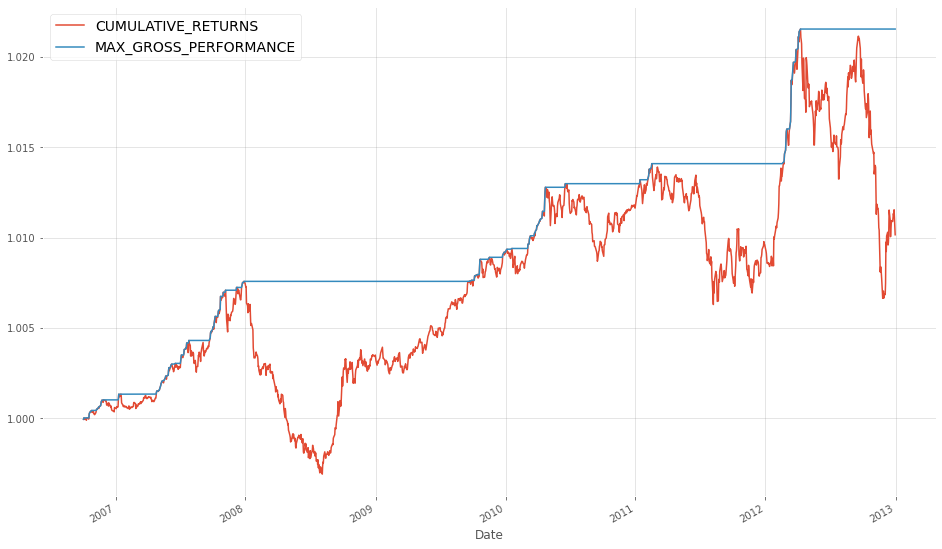

In [79]:
AAPL[['CUMULATIVE_RETURNS', 'MAX_GROSS_PERFORMANCE']].dropna().plot(figsize = (16, 10))

<AxesSubplot:xlabel='Date'>

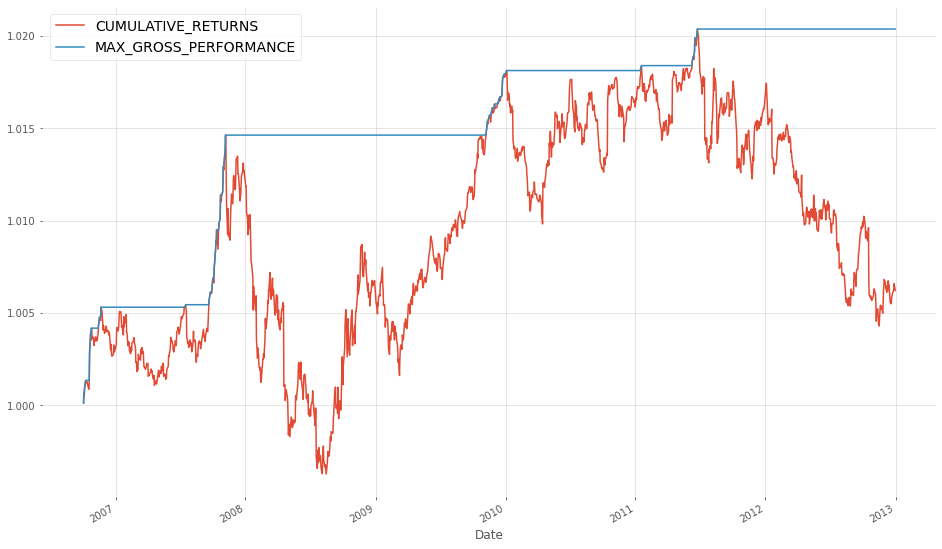

In [80]:
GOOGL[['CUMULATIVE_RETURNS', 'MAX_GROSS_PERFORMANCE']].dropna().plot(figsize = (16, 10))

<AxesSubplot:xlabel='Date'>

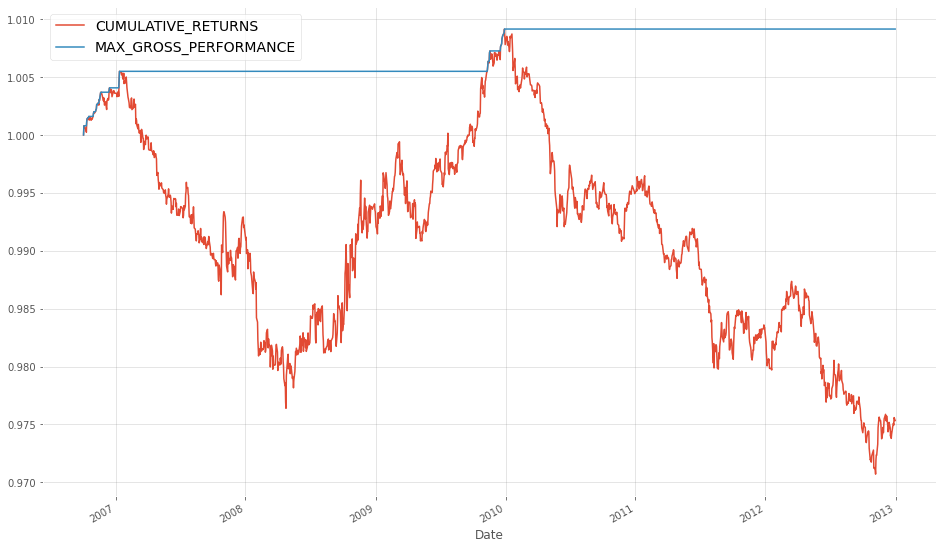

In [81]:
MSFT[['CUMULATIVE_RETURNS', 'MAX_GROSS_PERFORMANCE']].dropna().plot(figsize = (16, 10))

### <font color = red> Answer 8 </font>
    
    As to AAPL,
    
    The maximum drawdown is about 0.014573313744696191 percentage points.
    The longest drawdown period lasts for 266 days.
    
    As to GOOGL,
    
    The maximum drawdown is about 0.018071895146602738 percentage points.
    The longest drawdown period lasts for 556 days.
    
    As to MSFT,
    
    The maximum drawdown is about 0.03811840586010199 percentage points.
    The longest drawdown period lasts for 1098 days.


###  <font color = blue> 👉 Question 9. </font> Using the current momentum strategy, which of the securities shows the greatest Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [82]:
AAPL_return = AAPL['returns']
AAPL_sharpe = np.sqrt(253) * (AAPL_return.mean() / AAPL_return.std())
AAPL_sharpe

0.29525856907855735

In [83]:
GOOGL_return = GOOGL['returns']
GOOGL_sharpe = np.sqrt(253) * (GOOGL_return.mean() / GOOGL_return.std())
GOOGL_sharpe

0.12667327317374572

In [84]:
MSFT_return = MSFT['returns']
MSFT_sharpe = np.sqrt(253) * (MSFT_return.mean() / MSFT_return.std())
MSFT_sharpe

-0.3573100543616547

### <font color = red> Answer 9 </font>

    The answer is AAPL, Sharp Ratio = 0.29525828853683994 .

###  <font color = blue> 👉 Question 10. </font> Report compound annual growth rate (CAGR) for `AAPL`, `GOOGL`, and `MSFT`.

### Below are the lines of code that lead to an answer:

In [85]:
AAPL_day = (AAPL.index[-1] - AAPL.index[0]).days

Cumulative_Strategy_Returns = AAPL.returns.cumsum().apply(np.exp)
CAGR_AAPL = ((Cumulative_Strategy_Returns)[-1]**(365/AAPL_day))-1
CAGR_AAPL*100

0.16176254620974273

In [86]:
GOOGL_day = (GOOGL.index[-1] - GOOGL.index[0]).days

Cumulative_Strategy_Returns = GOOGL.returns.cumsum().apply(np.exp)
CAGR_GOOGL = ((Cumulative_Strategy_Returns)[-1]**(365/GOOGL_day))-1
CAGR_GOOGL*100

0.09937842729876856

In [87]:
MSFT_day = (MSFT.index[-1] - MSFT.index[0]).days

Cumulative_Strategy_Returns = MSFT.returns.cumsum().apply(np.exp)
CAGR_MSFT = ((Cumulative_Strategy_Returns)[-1]**(365/MSFT_day))-1
CAGR_MSFT*100

-0.3987029600705072

### <font color = red> Answer 10 </font>


    AAPL  : 0.16176233462563694%__ 
    
    GOOGL : 0.09937842729876856%__ 
    
    MSFT  : -0.3987018131008879%__ 


> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊